## **Use Keras for building, training, tuning and evaluation of Digit Recognition Model**

Here is what you need to do:

1.
Take the train, validation, and test data
Use this tensorflow tutorial for an example of loading a numpy array into tf.data.Dataset, shuffling and batching data. You should create three tf.data.Dataset objects for train, validation, and test sets, respectively.

2.
Use Keras to build a neural network model with multiple hidden layers. you don’t need the flatten layer for this dataset because images are already flattened in to 40*40 vectors in the CSV file.


*   When working with a multi-class classification problem, the loss function is typically cross entropy loss. Depending on the format of your labels (target variable), there are two implementations of crossentrpy in Keras: 1- “categorical_crossentropy” and 2- “sparse_categorical_crossentropy”. The former is used when your labels are one-hot-encoded ( that is, each class label is modeled as a separate binary variable) while the latter is used when your class labels are integer coded (that is, class labels are modeled as integers 0…n where n is the number of classes ) Use an appropriate loss function based on how your labels are encoded.

3.
Fit the model to the training data and evaluate it on the validation data. Plot the learning curves and Answer the following questions:


*   **Does your model overfit?**
*   **Does the training and validation loss continue to decrease after the last epoch? If your validation loss is decreasing all the way to the final epoch, then continue training the model for a few more epochs until you see validation loss stops improving.**

 To continue training a model for more epochs, you just need to call the “fit” function on the model you already created. Note that the fit function does NOT start over with random weights; instead, it continues the training on the model it is called on.


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import kerastuner as kt
import random

# Load the data
file_path = "German_digits.csv"
housing = pd.read_csv(file_path)

# Separate features and target variable
X = housing.iloc[:, :-1].values / 255.0
y = housing.iloc[:, -1].values

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert data into tf.data.Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

#print(train_dataset)
#print(valid_dataset)
#print(test_dataset)

# Shuffle and batch the datasets
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(64)
valid_dataset = valid_dataset.batch(64)
test_dataset = test_dataset.batch(64)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1600)]            0         
                                                                 
 rescaling_6 (Rescaling)     (None, 1600)              0         
                                                                 
 dense_18 (Dense)            (None, 30)                48030     
                                                                 
 dense_19 (Dense)            (None, 30)                930       
                                                                 
 dense_20 (Dense)            (None, 10)                310       
                                                                 
Total params: 49270 (192.46 KB)
Trainable params: 49270 (192.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/25
56/56

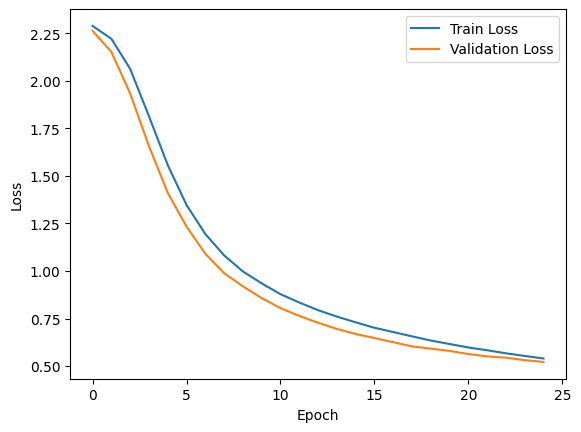

In [ ]:

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

def build_model(input_shape):
    # input layer gets the input image and pass it to the next layer ( no learnable parameters)
    input = keras.Input(shape=input_shape)

    # this layer scales the image tensor by dividing each pixel by 255 to bring all pixels to [0,1] range
    x = layers.experimental.preprocessing.Rescaling(1./255)(input)
    # The first hidden layer is a dense/fully connected layer
    x = layers.Dense(30, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed=1))(x)
    # The second hidden layer is a dense/fully connected
    x = layers.Dense(30, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed=1))(x)
    # The final output layer has 10 neurons with softmax activation to output the probabilities of each class (0-9)
    output = layers.Dense(10, activation="softmax")(x)
    # create a model and set its input and output and return it
    model = keras.Model(inputs=input, outputs=output)
    return model

# Build the neural network model
model_1 = build_model(input_shape=(X_train.shape[1],))

print(model_1.summary())

# Compile the model
model_1.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer="adam")

# Fit the model to the training data and evaluate on validation data
history_digit = model_1.fit(train_dataset, epochs=25, validation_data=valid_dataset)

# Plot learning curves
plt.plot(history_digit.history['loss'], label='Train Loss')
plt.plot(history_digit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
history_dict=history_digit.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

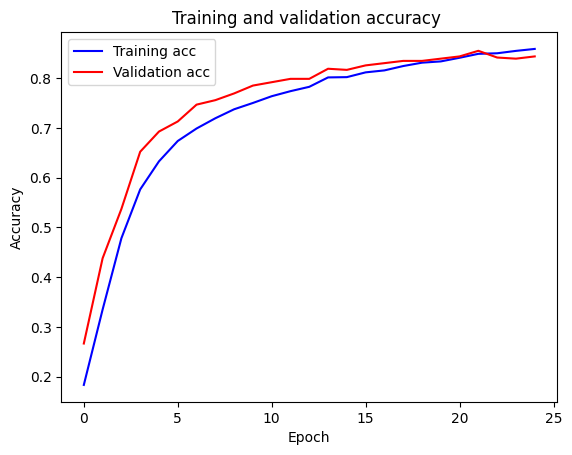

In [ ]:
#getting train and validation accuracies
acc_train = history_digit.history['accuracy']
val_acc = history_digit.history['val_accuracy']

#plotting the training and validation accurracies
plt.plot(history_digit.history['accuracy'], 'b', label='Training acc')
plt.plot(history_digit.history['val_accuracy'], 'r', label='Validation acc')
plt.title('Training and validation accuracy ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The model does not looks like over fit. Because, training loss continues to decrease and along with the validation loss. There is not much gap between these learning curves.

The training and validation loss continue to decrease after the last epochs. Lets run the model with more epochs.

Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.8655 - val_loss: 0.5136 - val_accuracy: 0.8646
Epoch 2/20
56/56 [==============================] - 0s 3ms/step - loss: 0.5155 - accuracy: 0.8638 - val_loss: 0.5052 - val_accuracy: 0.8555
Epoch 3/20
56/56 [==============================] - 0s 3ms/step - loss: 0.5037 - accuracy: 0.8684 - val_loss: 0.4940 - val_accuracy: 0.8555
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.8706 - val_loss: 0.4907 - val_accuracy: 0.8533
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.8749 - val_loss: 0.4798 - val_accuracy: 0.8668
Epoch 6/20
56/56 [==============================] - 0s 6ms/step - loss: 0.4748 - accuracy: 0.8766 - val_loss: 0.4744 - val_accuracy: 0.8668
Epoch 7/20
56/56 [==============================] - 0s 7ms/step - loss: 0.4650 - accuracy: 0.8763 - val_loss: 0.4649 - val_accuracy: 0.8691
Epoch 8/20
56/56 [==

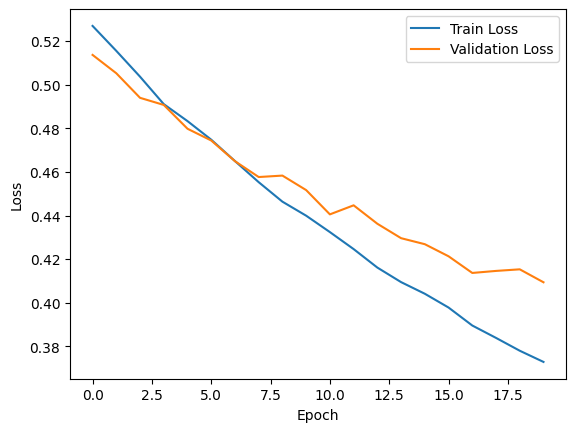

In [ ]:
# Fit the model to the training data and evaluate on validation data
history_digit_20 = model_1.fit(train_dataset, epochs=20, validation_data=valid_dataset)

# Plot learning curves
plt.plot(history_digit_20.history['loss'], label='Train Loss')
plt.plot(history_digit_20.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

There is more fluctuations in val_loss than train loss.

4.
Try learning rate scheduling, SGD with momentum or Adam optimizers, and batch normalization. Make sure that you re-define the model each time to start over with random weights. Does applying any of these techniques to your model help improve the learning?



Epoch 1/25
56/56 [==============================] - 1s 6ms/step - loss: 2.3028 - accuracy: 0.0912 - val_loss: 2.3025 - val_accuracy: 0.0790
Epoch 2/25
56/56 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.0771 - val_loss: 2.3024 - val_accuracy: 0.0903
Epoch 3/25
56/56 [==============================] - 0s 3ms/step - loss: 2.3024 - accuracy: 0.0904 - val_loss: 2.3023 - val_accuracy: 0.0926
Epoch 4/25
56/56 [==============================] - 0s 3ms/step - loss: 2.3023 - accuracy: 0.1071 - val_loss: 2.3022 - val_accuracy: 0.1084
Epoch 5/25
56/56 [==============================] - 0s 3ms/step - loss: 2.3022 - accuracy: 0.1099 - val_loss: 2.3021 - val_accuracy: 0.1129
Epoch 6/25
56/56 [==============================] - 0s 3ms/step - loss: 2.3021 - accuracy: 0.1099 - val_loss: 2.3020 - val_accuracy: 0.1151
Epoch 7/25
56/56 [==============================] - 0s 3ms/step - loss: 2.3021 - accuracy: 0.1028 - val_loss: 2.3020 - val_accuracy: 0.1129
Epoch 8/25
56/56 [==

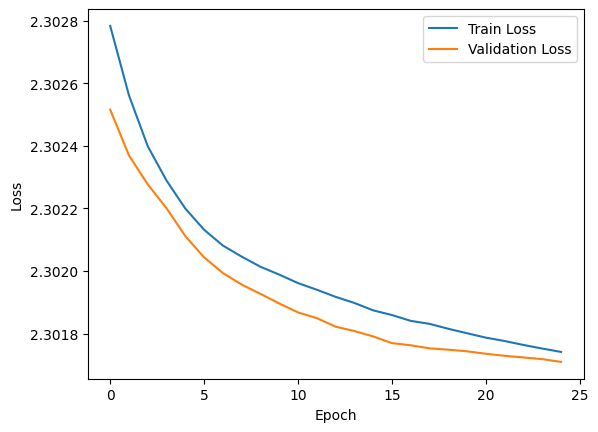

In [ ]:
# Learning rate scheduling

random.seed(2)
np.random.seed(2)
tf.random.set_seed(2)

#create a learning_rate schedule
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)

#rebuild  and recompile the model for learning rate scheduling
model_lr=build_model(input_shape=(X_train.shape[1],))
opt = tf.keras.optimizers.SGD(learning_rate = lr_schedule)
model_lr.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

# Fit the model to the training data and evaluate on validation data
history_lr = model_lr.fit(train_dataset, epochs=25, validation_data=valid_dataset)

# Plot learning curves
plt.plot(history_lr.history['loss'], label='Train Loss')
plt.plot(history_lr.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The training loss seems to be decreasing slowly  similarly the validation loss is decreasing. There is a not much gap between training and validation loss curves showing the model is good fit.

Epoch 1/25
56/56 [==============================] - 1s 5ms/step - loss: 2.3024 - accuracy: 0.1172 - val_loss: 2.3019 - val_accuracy: 0.1332
Epoch 2/25
56/56 [==============================] - 0s 3ms/step - loss: 2.3020 - accuracy: 0.1311 - val_loss: 2.3018 - val_accuracy: 0.1490
Epoch 3/25
56/56 [==============================] - 0s 3ms/step - loss: 2.3019 - accuracy: 0.1260 - val_loss: 2.3018 - val_accuracy: 0.1377
Epoch 4/25
56/56 [==============================] - 0s 3ms/step - loss: 2.3017 - accuracy: 0.1105 - val_loss: 2.3017 - val_accuracy: 0.1038
Epoch 5/25
56/56 [==============================] - 0s 3ms/step - loss: 2.3017 - accuracy: 0.1059 - val_loss: 2.3018 - val_accuracy: 0.1038
Epoch 6/25
56/56 [==============================] - 0s 3ms/step - loss: 2.3017 - accuracy: 0.1212 - val_loss: 2.3018 - val_accuracy: 0.1038
Epoch 7/25
56/56 [==============================] - 0s 3ms/step - loss: 2.3016 - accuracy: 0.1059 - val_loss: 2.3018 - val_accuracy: 0.1038
Epoch 8/25
56/56 [==

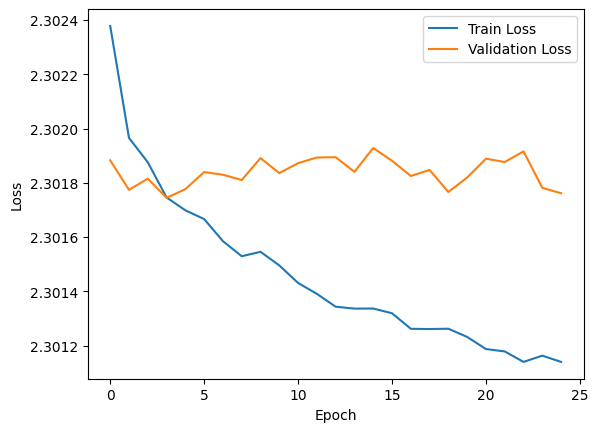

In [ ]:
# SGD with momentum

random.seed(21)
np.random.seed(21)
tf.random.set_seed(21)

lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)

opt = tf.keras.optimizers.SGD(learning_rate = lr_schedule, momentum=0.9, nesterov=True)
model_SGD=build_model(input_shape=(X_train.shape[1],))
model_SGD.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

# Fit the model to the training data and evaluate on validation data
history_SGD = model_SGD.fit(train_dataset, epochs=25, validation_data=valid_dataset)

# Plot learning curves
plt.plot(history_SGD.history['loss'], label='Train Loss')
plt.plot(history_SGD.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The training loss seems to be decreasing slowly. The validation loss is decreasing slightly at the first few epochs but then starts to increase and the model starts overfitting. There is a large gap between training and validation loss curves showing the model is terribly overfitting.

Epoch 1/25
56/56 [==============================] - 1s 12ms/step - loss: 2.2882 - accuracy: 0.2398 - val_loss: 2.2614 - val_accuracy: 0.3115
Epoch 2/25
56/56 [==============================] - 0s 4ms/step - loss: 2.2091 - accuracy: 0.3596 - val_loss: 2.1282 - val_accuracy: 0.4673
Epoch 3/25
56/56 [==============================] - 0s 3ms/step - loss: 2.0221 - accuracy: 0.4596 - val_loss: 1.8876 - val_accuracy: 0.5214
Epoch 4/25
56/56 [==============================] - 0s 3ms/step - loss: 1.7697 - accuracy: 0.5218 - val_loss: 1.6397 - val_accuracy: 0.5734
Epoch 5/25
56/56 [==============================] - 0s 3ms/step - loss: 1.5472 - accuracy: 0.5992 - val_loss: 1.4336 - val_accuracy: 0.6479
Epoch 6/25
56/56 [==============================] - 0s 3ms/step - loss: 1.3701 - accuracy: 0.6534 - val_loss: 1.2762 - val_accuracy: 0.6479
Epoch 7/25
56/56 [==============================] - 0s 3ms/step - loss: 1.2300 - accuracy: 0.6686 - val_loss: 1.1497 - val_accuracy: 0.6840
Epoch 8/25
56/56 [=

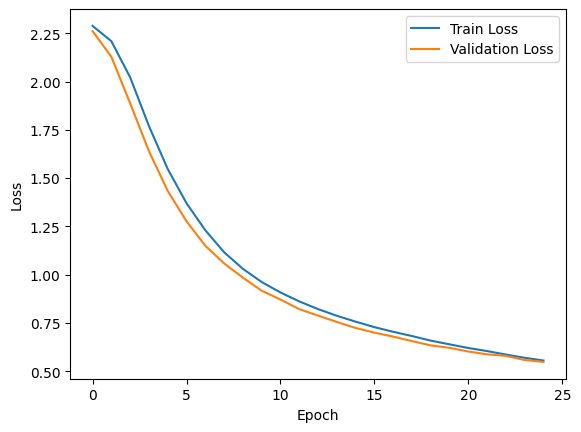

In [ ]:
# Adam optimizers

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_adam=build_model(input_shape=(X_train.shape[1],))
model_adam.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

# Fit the model to the training data and evaluate on validation data
history_adam = model_adam.fit(train_dataset, epochs=25, validation_data=valid_dataset)

# Plot learning curves
plt.plot(history_adam.history['loss'], label='Train Loss')
plt.plot(history_adam.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The training loss  and the validation loss is decreasing.There is not much gap between training and validation loss curves showing the model is a good fit model. At the end of the training, the training accurracy reaches to about 85% and the validation accurracy is about 83%.

Epoch 1/25
56/56 [==============================] - 2s 7ms/step - loss: 1.5079 - accuracy: 0.5339 - val_loss: 2.2853 - val_accuracy: 0.2122
Epoch 2/25
56/56 [==============================] - 0s 4ms/step - loss: 0.8624 - accuracy: 0.8260 - val_loss: 2.2530 - val_accuracy: 0.2144
Epoch 3/25
56/56 [==============================] - 0s 4ms/step - loss: 0.6008 - accuracy: 0.8811 - val_loss: 2.2019 - val_accuracy: 0.2460
Epoch 4/25
56/56 [==============================] - 0s 4ms/step - loss: 0.4444 - accuracy: 0.9121 - val_loss: 2.1666 - val_accuracy: 0.1332
Epoch 5/25
56/56 [==============================] - 0s 4ms/step - loss: 0.3584 - accuracy: 0.9237 - val_loss: 2.1233 - val_accuracy: 0.1490
Epoch 6/25
56/56 [==============================] - 0s 4ms/step - loss: 0.2914 - accuracy: 0.9418 - val_loss: 2.0553 - val_accuracy: 0.2032
Epoch 7/25
56/56 [==============================] - 0s 4ms/step - loss: 0.2304 - accuracy: 0.9551 - val_loss: 1.9972 - val_accuracy: 0.2167
Epoch 8/25
56/56 [==

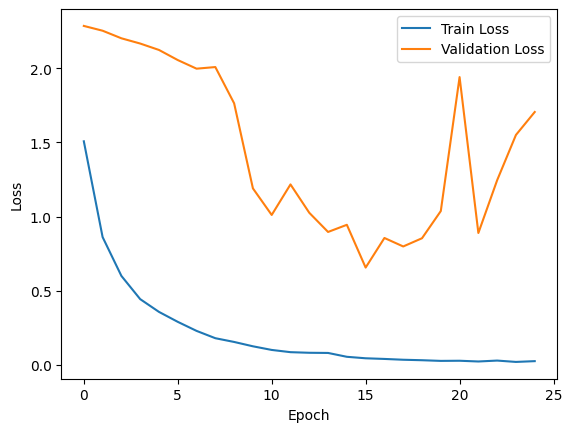

In [ ]:
# Batch normalization

#rebuild  and recompile the model
def build_model_with_batch_norm(input_shape):
    # Input layer
    input = keras.Input(shape=input_shape)

    # Preprocessing layer (rescaling)
    x = layers.experimental.preprocessing.Rescaling(1./255)(input)

    # First hidden layer with BatchNormalization
    x = layers.Dense(30, kernel_initializer=tf.keras.initializers.he_normal(seed=1))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Second hidden layer with BatchNormalization
    x = layers.Dense(30, kernel_initializer=tf.keras.initializers.he_normal(seed=1))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Output layer
    output = layers.Dense(10, activation="softmax")(x)

    # Create the model
    model = keras.Model(inputs=input, outputs=output)
    return model

# Build the neural network model with batch normalization
model_batch_norm = build_model_with_batch_norm(input_shape=(X_train.shape[1],))

# Cosine decay learning rate schedule
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)

# Adam optimizer with the learning rate schedule
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model_batch_norm.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

# Fit the model to the training data and evaluate on validation data
history_batch_norm = model_batch_norm.fit(train_dataset, epochs=25, validation_data=valid_dataset)

# Plot learning curves
plt.plot(history_batch_norm.history['loss'], label='Train Loss')
plt.plot(history_batch_norm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The training loss seems to be decreasing slowly but steadily. the validation loss is decreasing slightly at the first few epochs but then starts to increase and the model starts overfitting. We see much variations in validation loss. There is a large gap between training and validation loss curves. This model looks overfitting. At the end of the training, the training accurracy reaches to about 99% but the validation accurracy is about 61%.

Among all 4, the Adam optimizers have better learning curves and accuracy
 on training data and validation data than others.

5.
As we learned in the lecture, the general advice for designing a neural network model is to reduce the training loss as much as possible until the model starts to overfit. Then at that point start regularizing your model. If your model is not overfitting, add more layers to reduce training loss further until your model starts overfitting Regularize your model using early stopping, dropout, and/or weight decay. Interpret the learning curves.



Epoch 1/25
56/56 [==============================] - 2s 14ms/step - loss: 1.9470 - accuracy: 0.4407 - val_loss: 2.5273 - val_accuracy: 0.0926
Epoch 2/25
56/56 [==============================] - 0s 6ms/step - loss: 1.2286 - accuracy: 0.7212 - val_loss: 2.4845 - val_accuracy: 0.0926
Epoch 3/25
56/56 [==============================] - 0s 6ms/step - loss: 0.9559 - accuracy: 0.7966 - val_loss: 2.4327 - val_accuracy: 0.1693
Epoch 4/25
56/56 [==============================] - 0s 6ms/step - loss: 0.8059 - accuracy: 0.8342 - val_loss: 2.3634 - val_accuracy: 0.2099
Epoch 5/25
56/56 [==============================] - 0s 5ms/step - loss: 0.7022 - accuracy: 0.8520 - val_loss: 2.2242 - val_accuracy: 0.2957
Epoch 6/25
56/56 [==============================] - 0s 5ms/step - loss: 0.6389 - accuracy: 0.8692 - val_loss: 2.1171 - val_accuracy: 0.3883
Epoch 7/25
56/56 [==============================] - 0s 5ms/step - loss: 0.5921 - accuracy: 0.8777 - val_loss: 1.9686 - val_accuracy: 0.5011
Epoch 8/25
56/56 [=

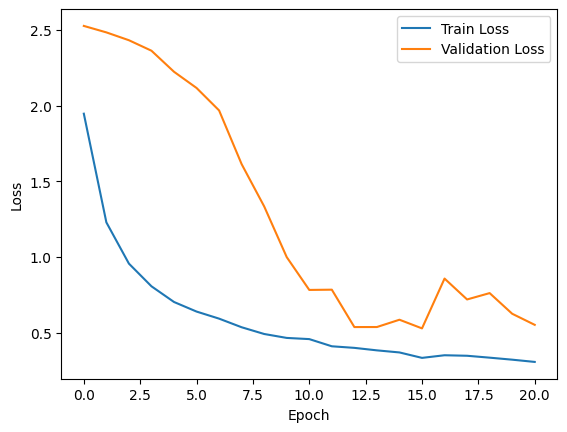

In [ ]:
from tensorflow.keras import regularizers

# Set random seeds for reproducibility
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

def build_model_with_dropout(input_shape):
    # Input layer
    input = keras.Input(shape=input_shape)

    # Preprocessing layer (rescaling)
    x = layers.experimental.preprocessing.Rescaling(1./255)(input)

    # First hidden layer with Dropout
    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), kernel_initializer=tf.keras.initializers.he_normal(seed=1))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(0.2)(x)  # Dropout rate set to 0.2

    # Second hidden layer with Dropout
    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), kernel_initializer=tf.keras.initializers.he_normal(seed=1))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(0.2)(x)  # Dropout rate set to 0.2

    # Output layer
    output = layers.Dense(10, activation="softmax")(x)

    # Create the model
    model = keras.Model(inputs=input, outputs=output)
    return model

# Define input shape
input_shape = (X_train.shape[1],)

# Build the neural network model with dropout regularization
model_dropout = build_model_with_dropout(input_shape=input_shape)

# Cosine decay learning rate schedule
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)

# Adam optimizer with the learning rate schedule
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model_dropout.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Fit the model to the training data and evaluate on validation data
history_dropout = model_dropout.fit(train_dataset, epochs=25, validation_data=valid_dataset, callbacks=[early_stopping])

# Plot learning curves
plt.plot(history_dropout.history['loss'], label='Train Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The training loss gradually decreases throughout all epochs. Initially, the validation loss also decreases, but towards the end of the epochs, it exhibits some fluctuations. There is a noticeable difference between the training and validation loss curves in the initial epochs, but this gap reduces as training progresses. By the end of the training, the training accuracy reaches approximately 94%, while the validation accuracy is around 87%.

**Model without Regularization:**

Training Loss: Initially, the training loss decreases rapidly as the model learns to fit the training data. However, as the number of epochs increases, the training loss continues to decrease until it reaches a very low value.

Validation Loss: Initially, the validation loss decreases along with the training loss, indicating that the model is also performing well on the validation set. However, after a certain number of epochs, the validation loss starts to increase, diverging from the training loss. This divergence suggests that the model is overfitting to the training data and generalizing poorly to unseen data.

**Model with Regularization (Dropout):**

Training Loss: Similar to the model without regularization, the training loss decreases initially as the model learns to fit the training data. However, the rate of decrease may be slightly slower due to the dropout regularization.

Validation Loss: The validation loss typically follows a similar pattern as the training loss, decreasing initially. However, since the dropout regularization helps prevent overfitting, the validation loss stabilize or increase at a slower rate compared to the model without regularization. This indicates that the model with regularization generalizes better to unseen data and is less likely to overfit.


Overall, the learning curves of the model with regularization (dropout) demonstrate better generalization performance compared to the model without regularization. The regularization techniques help in overfitting, leading to a more stable and reliable model that performs well on unseen data.

6.
Use hyperband to tune the hyperparameters learning_rate, number of layers, number of neurons in each layer, dropout rate, and learning rate decay steps. Set the max_epochs to a value slightly higher than the number of epochs you expect your model to converge, and useearly stopping during training. Get the best model and print the best hyperparameter combination you found.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import kerastuner as kt

# Define the model builder function
def model_hyperband(hp):
    # Define the placeholder for each hyperparameter
    hp_units = hp.Int('units', min_value=16, max_value=512, step=32)
    hp_num_layers = hp.Int('num_layers', min_value=1, max_value=10, step=1)
    hp_dropout_rate = hp.Float('dropout', min_value=0, max_value=0.5, step=0.1)
    hp_learning_rate = hp.Float("initial_learning_rate", min_value=1e-4, max_value=1e-2, sampling='log')
    hp_momentum = hp.Choice("momentum", values=[0.9, 0.99])
    hp_lr_decay_steps = hp.Choice("lr_decay_steps", values=[1000, 5000, 10000])
    hp_weight_decay = hp.Float("weight_decay", min_value=1e-3, max_value=1e-1, sampling='log')

    # Define the model architecture
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape= X_train.shape[1:] ))  # Adjust input shape to match your data size

    # Add hidden layers
    for _ in range(hp_num_layers):
        model.add(layers.Dense(units=hp_units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(hp_weight_decay)))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(rate=hp_dropout_rate))

    # Output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    # Define the learning rate schedule
    lr_schedule = keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=hp_learning_rate,
        decay_steps=hp_lr_decay_steps,
        alpha=1e-2
    )

    # Configure and compile the model
    opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=hp_momentum, nesterov=True)
    model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

    return model

# Instantiate the tuner
tuner = kt.Hyperband(model_hyperband,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='hyperband',
                     project_name='german_digits')

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=30, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(best_hyperparameters.values)

Trial 84 Complete [00h 00m 21s]
val_accuracy: 0.8177965879440308

Best val_accuracy So Far: 0.9406779408454895
Total elapsed time: 00h 29m 05s
Best Hyperparameters:
{'units': 272, 'num_layers': 5, 'dropout': 0.4, 'initial_learning_rate': 0.0008688274388989987, 'momentum': 0.99, 'lr_decay_steps': 5000, 'weight_decay': 0.0029203812485812295, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0063'}


7. Now it is time to test it on the test set. What is the accuracy of your best model on the test data?

In [ ]:
# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hyperparameters)

# Retrain the model on the entire training data
best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy}")

Epoch 1/50
89/89 [==============================] - 4s 18ms/step - loss: 7.3129 - accuracy: 0.2041 - val_loss: 6.2871 - val_accuracy: 0.4831
Epoch 2/50
89/89 [==============================] - 1s 15ms/step - loss: 6.5043 - accuracy: 0.4933 - val_loss: 5.9394 - val_accuracy: 0.7387
Epoch 3/50
89/89 [==============================] - 1s 14ms/step - loss: 6.3356 - accuracy: 0.6066 - val_loss: 5.8377 - val_accuracy: 0.8008
Epoch 4/50
89/89 [==============================] - 1s 15ms/step - loss: 6.1132 - accuracy: 0.6758 - val_loss: 5.4841 - val_accuracy: 0.8390
Epoch 5/50
89/89 [==============================] - 1s 15ms/step - loss: 5.7694 - accuracy: 0.7140 - val_loss: 5.1318 - val_accuracy: 0.8672
Epoch 6/50
89/89 [==============================] - 1s 15ms/step - loss: 5.2837 - accuracy: 0.7677 - val_loss: 4.7841 - val_accuracy: 0.8757
Epoch 7/50
89/89 [==============================] - 1s 14ms/step - loss: 4.8748 - accuracy: 0.7931 - val_loss: 4.4029 - val_accuracy: 0.8969
Epoch 8/50
89

The accuracy of the best model on the test data is 95%.

8. Plot a few images that were incorrectly classified by your model. Can you find any systematic mistake on those examples ( in particular, look at the examples where the model was most confident in its wrong predictions)

14/14 [==============================] - 0s 3ms/step


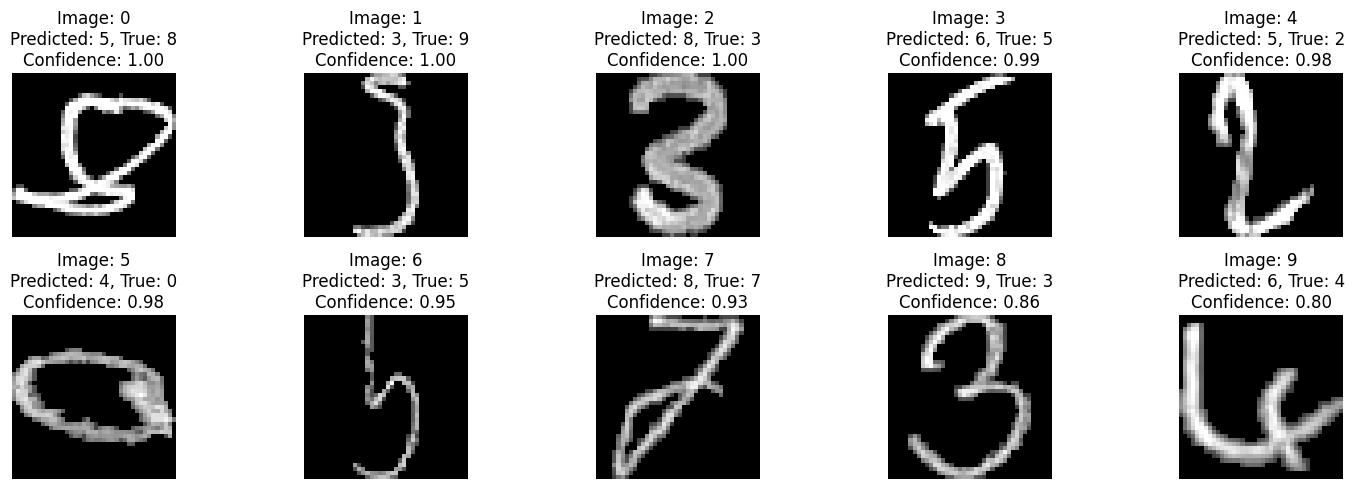

In [ ]:
# Predict labels and probabilities for the test set
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Find indices of incorrectly classified images
incorrect_indices = np.where(y_pred != y_test)[0]
#print(incorrect_indices)

# Find the confidence of the model in its predictions for the incorrectly classified images
confidence_scores = np.max(y_pred_probs[incorrect_indices], axis=1)

# Sort the indices based on confidence scores in descending order
sorted_indices = np.argsort(confidence_scores)[::-1]

# The number of images to plot
num_images_to_plot = 10

# Create a figure and axes
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

# Loop through the images
for i, ax in enumerate(axes.flat):
    # Get the index of the image to plot
    index = incorrect_indices[sorted_indices[i]]
    predicted_label = y_pred[index]
    true_label = y_test[index]
    confidence_score = confidence_scores[sorted_indices[i]]

    # Plot the image
    ax.imshow(X_test[index].reshape(40, 40), cmap='gray')
    ax.set_title(f"Image: {i}\nPredicted: {predicted_label}, True: {true_label}\nConfidence: {confidence_score:.2f}")
    ax.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



If we analyze the images:

Image 6 and Image 7: The true labels are 5 and 7 , but the image 6 appears to be an unconventional handwritten pattern, resembling the digit 3. This could lead to misclassification as 3. Similarly, Image 7 resembling the digit 8 duw to the pattern.

Image 5 and Image 1: The image appears to be poorly written, making it difficult for the model to accurately recognize the digit.

Image 0 and Image 9: These images have similar shapes, where the digit 8 can be mistaken for 5 or digit 4 can be mistaken for 6 due to similarities in their features.

Based on these observations, we can categorize the systematic mistakes as follows:

1.   The model might struggle with digits that have similar shapes or features.
2.   It might also misclassify digits that are poorly written or have unusual variations.







